In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from nltk.corpus import stopwords
# import gensim

In [2]:
train_df = pd.read_csv('../nlp-getting-started/train.csv')
test_df = pd.read_csv('../nlp-getting-started/test.csv')

In [3]:
test_df

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [4]:
train_df.head()
train_df.info()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


## Methodology 

- Feature extraction
- data exploration
- things to get in mind to separate (feature creation):
    - locations
    - hashtags 
    - locations in text
    - keywords in text 

- evaluate relations between this variables
- evaluate baseline algorithms
- evalutate machine learning algorithms (random forest, xgboost)

## 1. Feature Extraction

__Word and character count__


In [5]:
train_df['wordcount'] = train_df['text'].apply(lambda x: len(x.split(' ')))
train_df.head(5)

,id,keyword,location,text,target,wordcount
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,13
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,7
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,22
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,9
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,17


In [6]:
train_df['char_count'] = train_df['text'].apply(lambda x: len(x))
train_df.head(5)

,id,keyword,location,text,target,wordcount,char_count
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,13,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,7,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,22,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,9,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,17,88


In [7]:
def avg_word(text):
    words = text.split()
    avg_word = sum(len(word) for word in words)/len(words)
    return avg_word

In [8]:
train_df['avg_word'] = train_df['text'].apply(lambda x: avg_word(x))
train_df.head(5)

,id,keyword,location,text,target,wordcount,char_count,avg_word
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,13,69,4.384615
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,7,38,4.571429
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,22,133,5.090909
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,9,65,7.125000
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,17,88,4.500000


In [9]:
#number of stopwords
stopwords_words = stopwords.words('english')

train_df['stopwords_count'] = train_df['text'].apply(lambda x: len([word for word in x.split() if word in stopwords_words]))
train_df.head(5)

,id,keyword,location,text,target,wordcount,char_count,avg_word,stopwords_count
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,13,69,4.384615,5
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,7,38,4.571429,0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,22,133,5.090909,9
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,9,65,7.125000,1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,17,88,4.500000,6


In [10]:
# number of special characters
# looking for hashtags
train_df['hashtags'] = train_df['text'].apply(lambda x: [word for word in x.split() if word.startswith('#')])
train_df['hashtag_count'] = train_df['text'].apply(lambda x: len([word for word in x.split() if word.startswith('#')]))
train_df.head(5)

,id,keyword,location,text,target,wordcount,char_count,avg_word,stopwords_count,hashtags,hashtag_count
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,13,69,4.384615,5,[#earthquake],1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,7,38,4.571429,0,[],0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,22,133,5.090909,9,[],0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,9,65,7.125000,1,[#wildfires],1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,17,88,4.500000,6,"[#Alaska, #wildfires]",2


In [11]:
# number of uppercase
train_df['upper'] = train_df['text'].apply(lambda x: len([word for word in x.split() if word.isupper()]))
train_df.head(5)

,id,keyword,location,text,target,wordcount,char_count,avg_word,stopwords_count,hashtags,hashtag_count,upper
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,13,69,4.384615,5,[#earthquake],1,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,7,38,4.571429,0,[],0,0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,22,133,5.090909,9,[],0,0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,9,65,7.125000,1,[#wildfires],1,0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,17,88,4.500000,6,"[#Alaska, #wildfires]",2,0


In [12]:
#create keyword and location flags
train_df['keyword_flg'] = 0
train_df.loc[~train_df['keyword'].isna(),'keyword_flg'] =1
train_df.loc[train_df['keyword'].isna(),'keyword_flg'] =0

train_df['location_flg'] = 0
train_df.loc[~train_df['location'].isna(),'location_flg'] =1
train_df.loc[train_df['location'].isna(),'location_flg'] =0

/Users/gonzalosanchez/Documents/Data science/Kaggle/Competitions/NLP with Disaster Tweets/testenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='keyword_flg', ylabel='count'>

Text(0.5, 1.0, 'keyword vs target')

/Users/gonzalosanchez/Documents/Data science/Kaggle/Competitions/NLP with Disaster Tweets/testenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='location_flg', ylabel='count'>

Text(0.5, 1.0, 'location vs target')

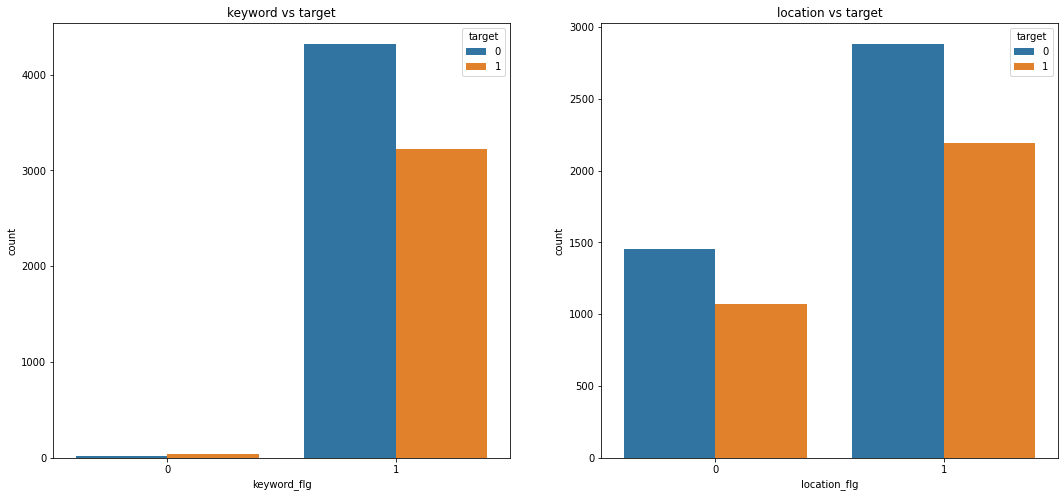

In [13]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
# train_df[['keyword_flg', 'target']].groupby(['keyword_flg']).count().plot.bar(ax=ax[0])
sns.countplot('keyword_flg', hue='target', data=train_df, ax=ax[0])
ax[0].set_title('keyword vs target')
sns.countplot('location_flg', hue='target', data=train_df, ax=ax[1])
ax[1].set_title('location vs target')
plt.show()

```location_flg``` dont tell anything aparently, but ```keyword_flg``` seems to be something

In [14]:
# train_df['text'][0].lower()
train_df

,id,keyword,location,text,target,wordcount,char_count,avg_word,stopwords_count,hashtags,hashtag_count,upper,keyword_flg,location_flg
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,13,69,4.384615,5,[#earthquake],1,1,0,0
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,7,38,4.571429,0,[],0,0,0,0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,22,133,5.090909,9,[],0,0,0,0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,9,65,7.125000,1,[#wildfires],1,0,0,0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,17,88,4.500000,6,"[#Alaska, #wildfires]",2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,11,83,6.636364,2,[],0,0,0,0
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,20,125,5.300000,7,[],0,0,0,0
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,8,65,7.250000,1,[],0,2,0,0
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,19,137,6.263158,5,[],0,0,0,0


<AxesSubplot:>

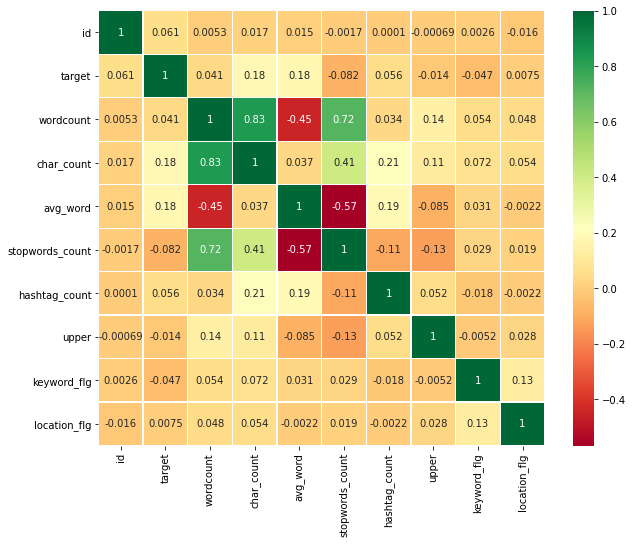

In [15]:
# Let's look the correleation
sns.heatmap(train_df.corr(), annot=True, cmap='RdYlGn', linewidths=0.2) # data.corr()-->correleation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

We dont see anything relevant in the features 
We need a relation between the target and the other features

## 2. Basic Pre-procesing

__Lower case__

In [16]:
train_df['text'] = train_df['text'].str.lower()
train_df.head()

,id,keyword,location,text,target,wordcount,char_count,avg_word,stopwords_count,hashtags,hashtag_count,upper,keyword_flg,location_flg
0,1,NaN,NaN,our deeds are the reason of this #earthquake m...,1,13,69,4.384615,5,[#earthquake],1,1,0,0
1,4,NaN,NaN,forest fire near la ronge sask. canada,1,7,38,4.571429,0,[],0,0,0,0
2,5,NaN,NaN,all residents asked to 'shelter in place' are ...,1,22,133,5.090909,9,[],0,0,0,0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,9,65,7.125000,1,[#wildfires],1,0,0,0
4,7,NaN,NaN,just got sent this photo from ruby #alaska as ...,1,17,88,4.500000,6,"[#Alaska, #wildfires]",2,0,0,0


__Removing punctuation__

In [17]:
train_df['text'] = train_df['text'].str.replace('[^\w\s]', '')
train_df['text'].head

<bound method NDFrame.head of 0       our deeds are the reason of this earthquake ma...
1                   forest fire near la ronge sask canada
2       all residents asked to shelter in place are be...
3       13000 people receive wildfires evacuation orde...
4       just got sent this photo from ruby alaska as s...
                              ...                        
7608    two giant cranes holding a bridge collapse int...
7609    aria_ahrary thetawniest the out of control wil...
7610    m194 0104 utc5km s of volcano hawaii httptcozd...
7611    police investigating after an ebike collided w...
7612    the latest more homes razed by northern califo...
Name: text, Length: 7613, dtype: object>

__Removal of stopwords__

In [18]:
from nltk.corpus import stopwords

stopwords_words = stopwords.words('english')
train_df['text'] = train_df['text'].apply(lambda x: " ".join(word for word in x.split(' ') if word not in stopwords_words))
train_df['text'] 

0            deeds reason earthquake may allah forgive us
1                   forest fire near la ronge sask canada
2       residents asked shelter place notified officer...
3       13000 people receive wildfires evacuation orde...
4       got sent photo ruby alaska smoke wildfires pou...
                              ...                        
7608    two giant cranes holding bridge collapse nearb...
7609    aria_ahrary thetawniest control wild fires cal...
7610    m194 0104 utc5km volcano hawaii httptcozdtoyd8ebj
7611    police investigating ebike collided car little...
7612    latest homes razed northern california wildfir...
Name: text, Length: 7613, dtype: object

__Common word removal__

In [19]:
freq = pd.Series(' '.join(train_df['text']).split()).value_counts()[:10]
freq

like      345
im        299
amp       298
fire      250
get       229
new       224
via       220
people    196
news      193
one       192
dtype: int64

In [20]:
freq.index.to_list()

['like', 'im', 'amp', 'fire', 'get', 'new', 'via', 'people', 'news', 'one']

In [21]:
train_df['text'] = train_df['text'].apply(lambda x: " ".join(word for word in x.split(' ') if word not in freq.index.to_list()))
train_df['text'] 

0            deeds reason earthquake may allah forgive us
1                        forest near la ronge sask canada
2       residents asked shelter place notified officer...
3       13000 receive wildfires evacuation orders cali...
4       got sent photo ruby alaska smoke wildfires pou...
                              ...                        
7608    two giant cranes holding bridge collapse nearb...
7609    aria_ahrary thetawniest control wild fires cal...
7610    m194 0104 utc5km volcano hawaii httptcozdtoyd8ebj
7611    police investigating ebike collided car little...
7612    latest homes razed northern california wildfir...
Name: text, Length: 7613, dtype: object

__Rare words removal__

In [22]:
less_freq = pd.Series(' '.join(train_df['text']).split()).value_counts()[-10:]
less_freq

erdogans                   1
masterpiece                1
manor                      1
kynespeace                 1
angel_star39               1
theme                      1
postapocalypticflimflam    1
httptcofz8ytwqkwv          1
femnism                    1
pugprobs                   1
dtype: int64

In [23]:
train_df['text'] = train_df['text'].apply(lambda x: " ".join(word for word in x.split(' ') if word not in less_freq.index.to_list()))
train_df['text'] 

0            deeds reason earthquake may allah forgive us
1                        forest near la ronge sask canada
2       residents asked shelter place notified officer...
3       13000 receive wildfires evacuation orders cali...
4       got sent photo ruby alaska smoke wildfires pou...
                              ...                        
7608    two giant cranes holding bridge collapse nearb...
7609    aria_ahrary thetawniest control wild fires cal...
7610    m194 0104 utc5km volcano hawaii httptcozdtoyd8ebj
7611    police investigating ebike collided car little...
7612    latest homes razed northern california wildfir...
Name: text, Length: 7613, dtype: object

__Spelling correction__

In [24]:
from textblob import TextBlob


#it is too much time in processing
train_df['text'][:5]
train_df['text'][:5].apply(lambda x: str(TextBlob(x).correct()))

0         deeds reason earthquake may allah forgive us
1                     forest near la ronge sask canada
2    residents asked shelter place notified officer...
3    13000 receive wildfires evacuation orders cali...
4    got sent photo ruby alaska smoke wildfires pou...
Name: text, dtype: object

0         deeds reason earthquake may allah forgive us
1                      forest near la range ask canada
2    residents asked shelter place notified officer...
3    13000 receive wildfires evacuation orders cali...
4    got sent photo ruby alaska smoke wildfires hou...
Name: text, dtype: object

__Lemmatization__

In [26]:
from textblob import Word

train_df['text'] = train_df['text'].apply(lambda x: ' '.join([Word(word).lemmatize() for word in x.split()]))
train_df['text']

0              deed reason earthquake may allah forgive u
1                        forest near la ronge sask canada
2       resident asked shelter place notified officer ...
3       13000 receive wildfire evacuation order califo...
4       got sent photo ruby alaska smoke wildfire pour...
                              ...                        
7608    two giant crane holding bridge collapse nearby...
7609    aria_ahrary thetawniest control wild fire cali...
7610    m194 0104 utc5km volcano hawaii httptcozdtoyd8ebj
7611    police investigating ebike collided car little...
7612    latest home razed northern california wildfire...
Name: text, Length: 7613, dtype: object

In [56]:
# create a function for all the preprocesing and future prediction

def preprop_text(text_list):
    
#     put all preprocesing steps here
    text_list = text_list.str.lower()
    
    text_list = text_list.str.replace('[^\w\s]', '')
    
    stopwords_words = stopwords.words('english')
    text_list = text_list.apply(lambda x: " ".join(word for word in x.split(' ') if word not in stopwords_words))

    freq = pd.Series(' '.join(text_list).split()).value_counts()[:10]
    
    text_list = text_list.apply(lambda x: " ".join(word for word in x.split(' ') if word not in freq.index.to_list()))
    
    less_freq = pd.Series(' '.join(text_list).split()).value_counts()[-10:]
    
    text_list = text_list.apply(lambda x: " ".join(word for word in x.split(' ') if word not in less_freq.index.to_list()))
    
    text_list = text_list.apply(lambda x: ' '.join([Word(word).lemmatize() for word in x.split()]))
    
    return text_list

## 3. Modeling and evaluation

In [28]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout
from keras.layers import Bidirectional, GlobalAveragePooling1D
from keras.models import Sequential, Model

In [29]:
train_sentences = train_df['text'].values

In [57]:
# preprocess test sentences
test_sentences = preprop_text(test_df['text']).values

In [31]:
maxlen = 100 #maximum lenght of a sentence in a corpus
embeding_size = 50
max_features = 30000

In [35]:
vocab_size

21350

In [33]:
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(train_sentences))

train_sentences = tokenizer.texts_to_sequences(train_sentences)
test_sentences = tokenizer.texts_to_sequences(test_sentences)

x_train = pad_sequences(train_sentences, maxlen=maxlen)
x_test = pad_sequences(test_sentences, maxlen=maxlen)

In [58]:
test_sentences = tokenizer.texts_to_sequences(test_sentences)
x_test = pad_sequences(test_sentences, maxlen=maxlen)

In [34]:
vocab_size = len(tokenizer.word_index) + 1 #size of the vocabulary (total number of possible words)

In [54]:
y_train = train_df['target'].values

__Word Embeddings__

In [ ]:
import gensim

In [37]:
from gensim.scripts.glove2word2vec import glove2word2vec
# load the whole embeddings into memory

glove_input_file = '../glove/glove.6B.100d.txt'
word2vec_output_file = '../glove/glove.6B.100d.txt.word2vec'
f = open(glove_input_file)

embeddings_index = dict()
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print("Loaded vectors with len{}".format(len(embeddings_index)))
glove2word2vec(glove_input_file, word2vec_output_file)

Loaded vectors with len400001


(400001, 100)

In [40]:
# create a weight matrix of word in training docs

embedding_matrix = np.zeros((vocab_size, 100))

for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
    

In [50]:
embed_size = 100

In [51]:
# Embedding layer

inp = Input(shape=(maxlen,))

x = Embedding(vocab_size, embed_size, weights=[embedding_matrix])(inp)
x = Bidirectional(LSTM(50, return_sequences=True, dropout=0.1, recurrent_dropout=0.1))(x)
x = GlobalAveragePooling1D()(x)
x = Dense(50, activation='relu')(x)
x = Dropout(0.1)(x)
x = Dense(1, activation="sigmoid")(x)

model = Model(inputs=inp, outputs=x)
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

In [55]:
model.fit(x_train, y_train, batch_size=32, epochs=15, validation_split=0.1);

Epoch 1/15
215/215 [==============================] - 39s 183ms/step - loss: 0.5360 - accuracy: 0.7424 - val_loss: 0.4597 - val_accuracy: 0.7966
Epoch 2/15
215/215 [==============================] - 33s 152ms/step - loss: 0.4225 - accuracy: 0.8259 - val_loss: 0.4661 - val_accuracy: 0.8005
Epoch 3/15
215/215 [==============================] - 32s 150ms/step - loss: 0.3424 - accuracy: 0.8622 - val_loss: 0.5062 - val_accuracy: 0.8071
Epoch 4/15
215/215 [==============================] - 33s 152ms/step - loss: 0.2521 - accuracy: 0.9053 - val_loss: 0.5223 - val_accuracy: 0.7913
Epoch 5/15
215/215 [==============================] - 33s 153ms/step - loss: 0.1572 - accuracy: 0.9404 - val_loss: 0.5942 - val_accuracy: 0.7756
Epoch 6/15
215/215 [==============================] - 57s 264ms/step - loss: 0.1030 - accuracy: 0.9650 - val_loss: 0.6145 - val_accuracy: 0.7940
Epoch 7/15
215/215 [==============================] - 38s 177ms/step - loss: 0.0877 - accuracy: 0.9686 - val_loss: 0.7673 - val_ac

In [59]:
y_test = model.predict(x_test)
y_test = np.round(y_test).astype(int)

In [62]:
sample_submission = pd.read_csv('../nlp-getting-started/sample_submission.csv')
sample_submission['target'] = y_test
sample_submission.to_csv('submission.csv', index=False)